# Bhaskar Barman
# 21MS147


In [2]:
#Q1)
from math import *
def f(x):
    return sin(x)
x_0=2*pi/5


In [3]:
def fd(x,h):
    return (f(x+h)-f(x))/h
 
def bd(x,h):
    return (f(x)-f(x-h))/h

def cd(x,h):
    return (f(x+h)-f(x-h))/(2*h)

def fpa(x,h):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)    

# Creating a table to record the estimate derivatives using different methods for each h

In [4]:
h=[0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001]
print("h\t\t fd \t\tbd\t\t cd\t\t fpa\n")

for i in h:
    print(f"{i:0.5f}\t\t{fd(x_0,i):0.5f}\t\t{bd(x_0,i):0.5f}\t\t{cd(x_0,i):0.5f}\t\t{fpa(x_0,i):0.5f}\t")

h		 fd 		bd		 cd		 fpa

0.50000		0.06345		0.52915		0.29630		0.30839	
0.20000		0.21217		0.40175		0.30696		0.30900	
0.10000		0.26099		0.35602		0.30850		0.30902	
0.05000		0.28512		0.33266		0.30889		0.30902	
0.02000		0.29949		0.31851		0.30900		0.30902	
0.01000		0.30426		0.31377		0.30901		0.30902	
0.00500		0.30664		0.31139		0.30902		0.30902	
0.00200		0.30807		0.30997		0.30902		0.30902	
0.00100		0.30854		0.30949		0.30902		0.30902	
0.00050		0.30878		0.30925		0.30902		0.30902	
0.00020		0.30892		0.30911		0.30902		0.30902	
0.00010		0.30897		0.30906		0.30902		0.30902	


# Plotting the differences between exact values and the estimated values (the error)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
absfd=[]
absbd=[]
abscd=[]
absfpa=[]
exact=cos(x_0)
for i in h:
    absfd.append(abs(exact-fd(x_0,i)))
    absbd.append(abs(exact-bd(x_0,i)))
    abscd.append(abs(exact-cd(x_0,i)))
    absfpa.append(abs(exact-fpa(x_0,i)))


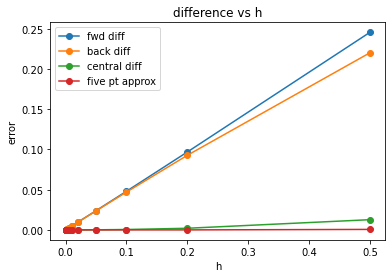

In [7]:
plt.plot(h,absfd,'o-')
plt.plot(h,absbd,'o-')
plt.plot(h,abscd,'o-')
plt.plot(h,absfpa,'o-')
plt.legend(['fwd diff','back diff','central diff','five pt approx'],loc='upper left')
plt.xlabel('h')
plt.ylabel('error')
plt.title('difference vs h')
plt.show()


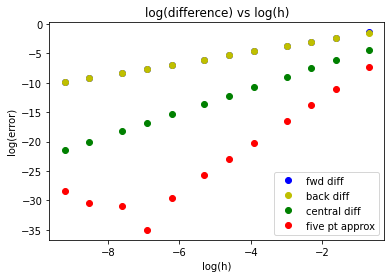

In [8]:
log_absfd=[]
log_absbd=[]
log_abscd=[]
log_absfpa=[]
log_h=[]
exact=cos(x_0)
for i in h:
    log_absfd.append(log(abs(exact-fd(x_0,i))))
    log_absbd.append(log(abs(exact-bd(x_0,i))))
    log_abscd.append(log(abs(exact-cd(x_0,i))))
    log_absfpa.append(log(abs(exact-fpa(x_0,i))))
    log_h.append(log(i))
plt.plot(log_h,log_absfd,'bo')    
plt.plot(log_h,log_absbd,'yo')     
plt.plot(log_h,log_abscd,'go') 
plt.plot(log_h,log_absfpa,'ro') 
plt.legend(['fwd diff','back diff','central diff','five pt approx'],loc='lower right')
plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.title('log(difference) vs log(h)')
plt.show()

In [9]:
from scipy.optimize import curve_fit

In [10]:
def line(x,m,c):
    return m*x+c 
param_fd,covar_fd=curve_fit(line,log_h,log_absfd)
param_bd,covar_bd=curve_fit(line,log_h,log_absbd)
param_cd,covar_cd=curve_fit(line,log_h,log_abscd)
param_fpa,covar_fpa=curve_fit(line,log_h,log_absfpa)

In [11]:
print("Slope\t\t Intercept")
print(param_fd)
print(param_bd)
print(param_cd)
print(param_fpa)




Slope		 Intercept
[ 1.00281838 -0.72345933]
[ 0.9945609  -0.78079027]
[ 1.9992408  -2.97112419]
[ 2.9570777  -7.93646914]


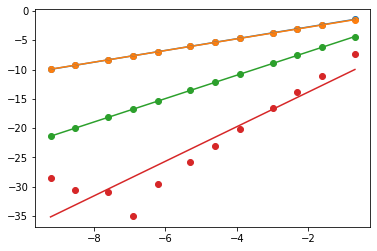

In [12]:
x_data=np.array(log_h)
plt.scatter(x_data,log_absfd)
plt.scatter(x_data,log_absbd)
plt.scatter(x_data,log_abscd)
plt.scatter(x_data,log_absfpa)
plt.plot(x_data,line(x_data,param_fd[0],param_fd[1]))
plt.plot(x_data,line(x_data,param_bd[0],param_bd[1]))
plt.plot(x_data,line(x_data,param_cd[0],param_cd[1]))
plt.plot(x_data,line(x_data,param_fpa[0],param_fpa[1]))





# Q2

In [18]:

def f(x):
    return exp(x)

# Trapizoidal

In [51]:
def trap(f,N,x,y):
    h=(y-x)/(N-1)
    sum=f(x)+f(y)   
    for i in range(1,N):
        c = x+i*h
        sum+=2*f(c)
    ans= (h/2)*sum
    return ans
print(trap(f,20,0,1))
print(trap(f,200,0,1))
print(trap(f,2000,0,1))
print(trap(f,20000,0,1))

1.8617459234250258
1.7319451519598537
1.7196416851170462
1.7184177497045352


# Simpson's 1/3

In [61]:
def quad(f,N,x,y):
    h=(y-x)/(N-1)
    t=np.arange(x,y,h)
    l=list(t)
    
    even=0
    odd=0
    for m in range(2,len(l),2):
        even+=f(t[m])
        
    for i in range(3,len(l),2):
        odd+=f(t[i])
    return (f(t[1])+f(t[-1])+(4*odd)+(2*even))*h/3 

print(quad(f,20,0,1))
print(quad(f,200,0,1))
print(quad(f,2000,0,1))
print(quad(f,20000,0,1))

1.5963826726496817
1.7069917267038974
1.7189745121792341
1.7181698478633989


# Simpson's 3/8 rule(cubic)

In [46]:
def cubic(f,N,x,y):
    h=(y-x)/(N-1)
    sum=f(x)+f(y)   
    for i in range(1,N):
        c = x+i*h
        if i%3==0:
            sum+=2*f(c)
        else:
            sum+=3*f(c)

    ans= (3*h/8)*sum
    return ans
        
print(cubic(f,20,0,1))
print(cubic(f,200,0,1))
print(cubic(f,2000,0,1))
print(cubic(f,20000,0,1))        

1.8444150744868701
1.7302426600617011
1.7194717567190108
1.718400760085138


# Quartic(Boole's rule)

In [110]:
def boole(f,N,x,y):
    sum=0
    h=(y-x)/(N-1)
    i=0
    for i in range(N):
     if (2*i+2)*h<=y:
      sum =sum+(f(x+h*(2*i))+4*f(x+(2*i+1)*h)+f(x+(2*i+2)*h))
    return sum*h/3
print(boole(f,20,0,1))
print(boole(f,200,0,1))
print(boole(f,2000,0,1))
print(boole(f,20000,0,1))

1.57891417293865
1.70465638424120
1.71692234770296
1.71814591096971


In [113]:

exact_val=1.7182
abs_trap=[]
abs_quad=[]
abs_cubic=[]
abs_boole=[]
N=[20,200,2000,20000]
h=[1/20,1/200,1/2000,1/20000]
for i in range(len(N)):
    
    abs_trap.append(abs(exact_val-trap(f,N[i],0,1)))
    abs_quad.append(abs(exact_val-quad(f,N[i],0,1))) 
    abs_cubic.append(abs(exact_val-cubic(f,N[i],0,1)))
    abs_boole.append(abs(exact_val-boole(f,N[i],0,1)))
 

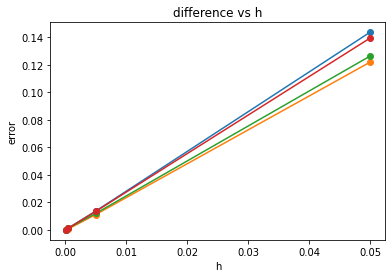

In [114]:
plt.plot(h,abs_trap,'o-')
plt.plot(h,abs_quad,'o-')
plt.plot(h,abs_cubic,'o-')
plt.plot(h,abs_boole,'o-')
plt.xlabel('h')
plt.ylabel('error')
plt.title('difference vs h')
plt.show()

4 4


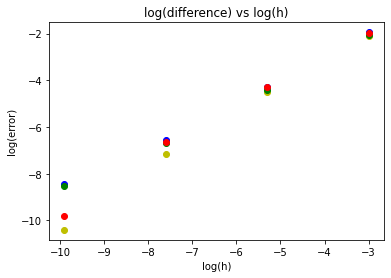

In [123]:
log_abs_trap=[]
log_abs_quad=[]
log_abs_cubic=[]
log_abs_boole=[]
log_h=[]

for i in range(len(N)):
    log_abs_trap.append(log(abs(exact_val-trap(f,N[i],0,1))))
    log_abs_quad.append(log(abs(exact_val-quad(f,N[i],0,1))))
    log_abs_cubic.append(log(abs(exact_val-cubic(f,N[i],0,1))))
    log_abs_boole.append(log(abs(exact_val-boole(f,N[i],0,1))))
    log_h.append(log(h[i]))   
    
print(len(log_h),len(log_abs_trap))    
plt.plot(log_h,log_abs_trap,'bo')    
plt.plot(log_h,log_abs_quad,'yo')     
plt.plot(log_h,log_abs_cubic,'go') 
plt.plot(log_h,log_abs_boole,'ro') 

plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.title('log(difference) vs log(h)')
plt.show()

In [124]:
def line(x,m,c):
    return m*x+c 
param_trap,covar_fd=curve_fit(line,log_h,log_abs_trap)
param_quad,covar_bd=curve_fit(line,log_h,log_abs_quad)
param_cubic,covar_cd=curve_fit(line,log_h,log_abs_cubic)
param_boole,covar_fpa=curve_fit(line,log_h,log_abs_boole)

In [126]:
print("Slope\t\t Intercept")
print(param_trap)
print(param_quad)
print(param_cubic)
print(param_boole)


Slope		 Intercept
[0.9436379  0.78552728]
[1.19796834 1.68421155]
[0.93716199 0.62687331]
[1.12577151 1.57061778]


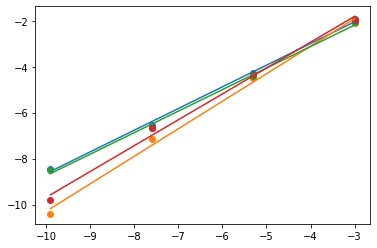

In [129]:
x_data=np.array(log_h)
plt.scatter(x_data,log_abs_trap)
plt.scatter(x_data,log_abs_quad)
plt.scatter(x_data,log_abs_cubic)
plt.scatter(x_data,log_abs_boole)
plt.plot(x_data,line(x_data,param_trap[0],param_trap[1]))
plt.plot(x_data,line(x_data,param_quad[0],param_quad[1]))
plt.plot(x_data,line(x_data,param_cubic[0],param_cubic[1]))
plt.plot(x_data,line(x_data,param_boole[0],param_boole[1]))


# Q3.

In [85]:

def f1(x):
    return (1-x**3)**(1/3)
def f2(x):
    return x*(1-x**3)**(-2/3)   
answer=3*(cubic(f1,20,0,2**(-1/3))+cubic(f2,20,0,2**(-1/3)))    
print(answer)


3.618325088747471


In [79]:
2*pi/3**0.5

3.6275987284684357